<a href="https://www.kaggle.com/code/sahilr05/smoke-detection-pridct-on-10-algoritham?scriptVersionId=106246499" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/smoke-detection-dataset/smoke_detection_iot.csv


In [2]:
data = pd.read_csv("/kaggle/input/smoke-detection-dataset/smoke_detection_iot.csv")

In [3]:
data.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [4]:
data.drop("Unnamed: 0",axis=1,inplace=True)

In [5]:
data["Fire Alarm"].value_counts()

1    44757
0    17873
Name: Fire Alarm, dtype: int64

In [6]:
data.shape

(62630, 15)

In [7]:
data.isnull().sum()

UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
data.corr()["Fire Alarm"].sort_values(ascending=False)

Fire Alarm        1.000000
CNT               0.673762
Humidity[%]       0.399846
Pressure[hPa]     0.249797
Raw H2            0.107007
NC2.5            -0.057707
NC1.0            -0.082828
PM2.5            -0.084916
eCO2[ppm]        -0.097006
PM1.0            -0.110552
NC0.5            -0.128118
Temperature[C]   -0.163902
TVOC[ppb]        -0.214743
Raw Ethanol      -0.340652
UTC              -0.389404
Name: Fire Alarm, dtype: float64

In [10]:
# number of unique Values
for i in data.columns:
    print(i, data[i].nunique())

UTC 62630
Temperature[C] 21672
Humidity[%] 3890
TVOC[ppb] 1966
eCO2[ppm] 1713
Raw H2 1830
Raw Ethanol 2659
Pressure[hPa] 2213
PM1.0 1337
PM2.5 1351
NC0.5 3093
NC1.0 4113
NC2.5 1161
CNT 24994
Fire Alarm 2


In [11]:
data.drop(["CNT"],axis=1,inplace=True)

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

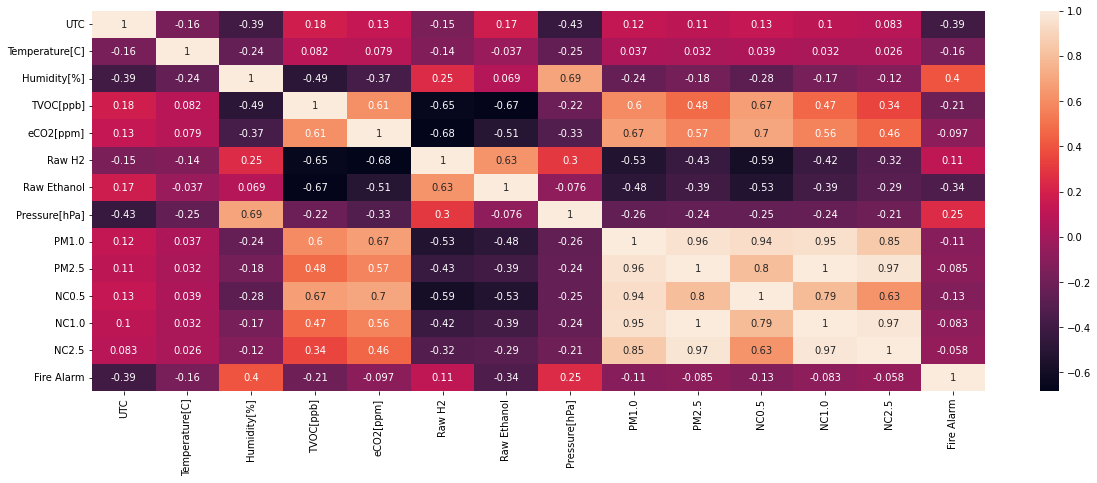

In [13]:
plt.figure(figsize=(20,7))
sns.heatmap(data.corr(),annot=True)

<AxesSubplot:xlabel='NC1.0', ylabel='NC2.5'>

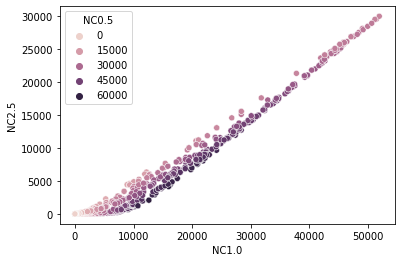

In [14]:
sns.scatterplot(x="NC1.0",y="NC2.5",data=data,hue="NC0.5")

<AxesSubplot:xlabel='Temperature[C]', ylabel='PM1.0'>

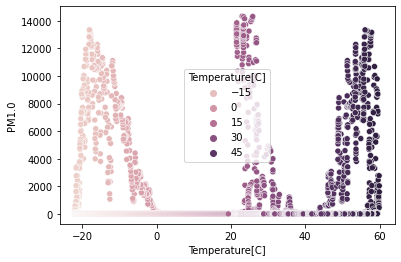

In [15]:
sns.scatterplot(y="PM1.0",x="Temperature[C]",data=data,hue="Temperature[C]")

<AxesSubplot:xlabel='PM1.0', ylabel='PM2.5'>

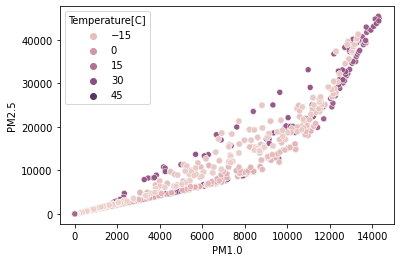

In [16]:
sns.scatterplot(y="PM2.5",x="PM1.0",data=data,hue="Temperature[C]")

<AxesSubplot:xlabel='Temperature[C]', ylabel='Humidity[%]'>

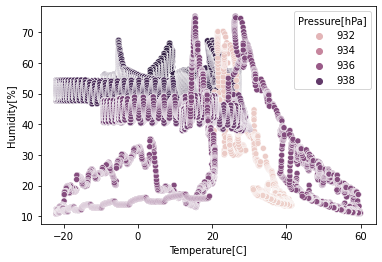

In [17]:
# Temperature have none reationship with Humidity
sns.scatterplot(x="Temperature[C]",y="Humidity[%]",data=data,hue="Pressure[hPa]")

In [18]:
x = data.drop(["Fire Alarm"],axis=1)
y = data["Fire Alarm"]

In [19]:
from sklearn.model_selection import train_test_split
# np.std(x[1])
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=2)

In [20]:
from sklearn.linear_model import LinearRegression
li =LinearRegression()
li.fit(x_train,y_train)
li.score(x_train,y_train) , li.score(x_test,y_test)

(0.5831114446047108, 0.5795623298930175)

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [22]:
rd =RandomForestClassifier()
rd.fit(x_train,y_train)
rd.score(x_train,y_train) , rd.score(x_test,y_test)

(1.0, 0.9999467773697376)

In [23]:
models = {
    "rd":RandomForestClassifier(),
    "ex":ExtraTreesClassifier(),
    "ad":AdaBoostClassifier(),
    "gb":GradientBoostingClassifier(),
    "dc": DecisionTreeClassifier(),
    "lg": LogisticRegression(),
    "knn":KNeighborsClassifier(),
    "sgd":SGDClassifier(),
    "bag":BaggingClassifier(),
    "svc":SVC()
}

In [24]:
name = []
train_score = []
test_score = []
for model in models.values():
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    name.append(model),
    print(model,accuracy_score(pred,y_test))
    train_score.append(model.score(x_train,y_train))
    test_score.append(model.score(x_test,y_test))
#     accuracy.append(accuracy_score(pred,y_test))
    
    

RandomForestClassifier() 0.9999467773697376
ExtraTreesClassifier() 0.9999467773697376
AdaBoostClassifier() 0.9998403321092129
GradientBoostingClassifier() 0.999733886848688
DecisionTreeClassifier() 0.9998935547394753
LogisticRegression() 0.7187716216935441
KNeighborsClassifier() 0.9995742189579009
SGDClassifier() 0.2812283783064559
BaggingClassifier() 0.9999467773697376
SVC() 0.7187716216935441


In [25]:
dis = {"Name":name,"train_score":train_score,"test_score":test_score}
score = pd.DataFrame(dis)
score

,Name,train_score,test_score
0,"(DecisionTreeClassifier(max_features='auto', r...",1.000000,0.999947
1,"(ExtraTreeClassifier(random_state=2033637857),...",1.000000,0.999947
2,"(DecisionTreeClassifier(max_depth=1, random_st...",0.999886,0.999840
3,([DecisionTreeRegressor(criterion='friedman_ms...,0.999795,0.999734
4,DecisionTreeClassifier(),1.000000,0.999894
5,LogisticRegression(),0.712849,0.718772
6,KNeighborsClassifier(),0.999749,0.999574
7,SGDClassifier(),0.287151,0.281228
8,(DecisionTreeClassifier(random_state=161106889...,0.999977,0.999947
9,SVC(),0.712849,0.718772


In [26]:
score.sort_values(by="train_score",ascending=False,inplace=True)

In [27]:
score

,Name,train_score,test_score
0,"(DecisionTreeClassifier(max_features='auto', r...",1.000000,0.999947
1,"(ExtraTreeClassifier(random_state=2033637857),...",1.000000,0.999947
4,DecisionTreeClassifier(),1.000000,0.999894
8,(DecisionTreeClassifier(random_state=161106889...,0.999977,0.999947
2,"(DecisionTreeClassifier(max_depth=1, random_st...",0.999886,0.999840
3,([DecisionTreeRegressor(criterion='friedman_ms...,0.999795,0.999734
6,KNeighborsClassifier(),0.999749,0.999574
5,LogisticRegression(),0.712849,0.718772
9,SVC(),0.712849,0.718772
7,SGDClassifier(),0.287151,0.281228


<AxesSubplot:xlabel='train_score', ylabel='test_score'>

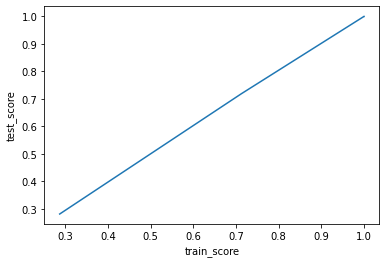

In [28]:
sns.lineplot(data=score,x="train_score",y="test_score")

<AxesSubplot:>

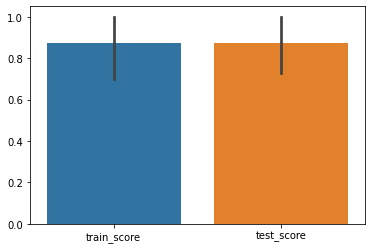

In [29]:
# sns.scatterplot(data=score,x="test_score",y="train_score")
sns.barplot(data=score)

In [30]:
# Predict
data.sample(5)

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
45157,1654781506,26.18,51.48,1023,400,13010,19476,938.730,2.01,2.09,13.82,2.155,0.049,1
25302,1654761651,13.95,49.61,7,400,12669,19721,939.798,0.05,0.08,0.31,0.085,0.024,0
9439,1654742770,-4.96,64.19,616,512,12884,19634,939.179,2.96,3.08,20.39,3.180,0.072,1
35938,1654772287,25.93,50.05,1048,652,12794,19476,939.054,2.14,2.22,14.71,2.294,0.052,1
25323,1654761672,11.29,55.98,10,400,12669,19717,939.794,0.09,0.13,0.53,0.137,0.035,0


In [31]:
rd.predict([[1654752213,20.741,52.60,1174,406,12915,19438,938.686,1.36,1.41,9.36,1.460,0.033]])

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([1])

😀^_^😃